<br> **Soliz, Joseph
<br> Astr 630
<br> 2022/01/28**

## Astr 630 Homework 5

Isochrones. To help you start to visualize what a population of stars with a uniform age and chemical composition looks like, let’s look again at the α Persei cluster from HW #1. (You may need to clean up your star selection.) The cluster is thought to be around 50 Myr old.

In [2]:
import csv #not needed but was placed in just in case
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import read_mist_models
import read_mist_models_Copy1
# change plotting defaults
plt.rc('axes', labelsize=14)
plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=16)
plt.rc('axes', titleweight='bold')
plt.rc('font', family='sans-serif')
plt.rcParams['errorbar.capsize'] = 3
opts = {'mec':'k', 'mew': 0.5, 'lw': 1}
plt.rcParams['figure.figsize'] = (16, 10)

In [3]:
data = np.genfromtxt('data/1643067283553O-result.csv', names=True, delimiter=',') #csv data with header columns
data

array([(4.68374400e+17, 60.03210049, 54.36634428, 3.54360397, 1.6618319 ,  0.72634196,  -2.37744463, 20.792524, 1.5054798, nan, nan),
       (4.68375465e+17, 59.96160024, 54.40314937, 6.82350711, 1.101364  , 33.00179506, -14.17544983, 20.089455, 2.8267155, nan, nan),
       (4.40728967e+17, 43.11600081, 51.9256503 , 3.86054307, 1.684711  ,  2.77063522,  -7.05948518, 20.780428, 1.6574402, nan, nan),
       ...,
       (2.51506555e+17, 57.21880991, 51.60824009, 4.7627726 , 0.4576637 , -2.95149182,   5.80489404, 19.687294, 3.309309 , nan, nan),
       (2.51506619e+17, 57.2112648 , 51.61974049, 2.28863612, 0.27639657, -1.28293887, -20.30245982, 19.187777, 2.9460258, nan, nan),
       (2.51506658e+17, 57.22373699, 51.62801102, 3.21271208, 1.578077  , -0.98927335,  -4.81627875, 20.793772, 2.2177258, nan, nan)],
      dtype=[('source_id', '<f8'), ('ra', '<f8'), ('dec', '<f8'), ('parallax', '<f8'), ('parallax_error', '<f8'), ('pmra', '<f8'), ('pmdec', '<f8'), ('phot_g_mean_mag', '<f8'), ('bp_r

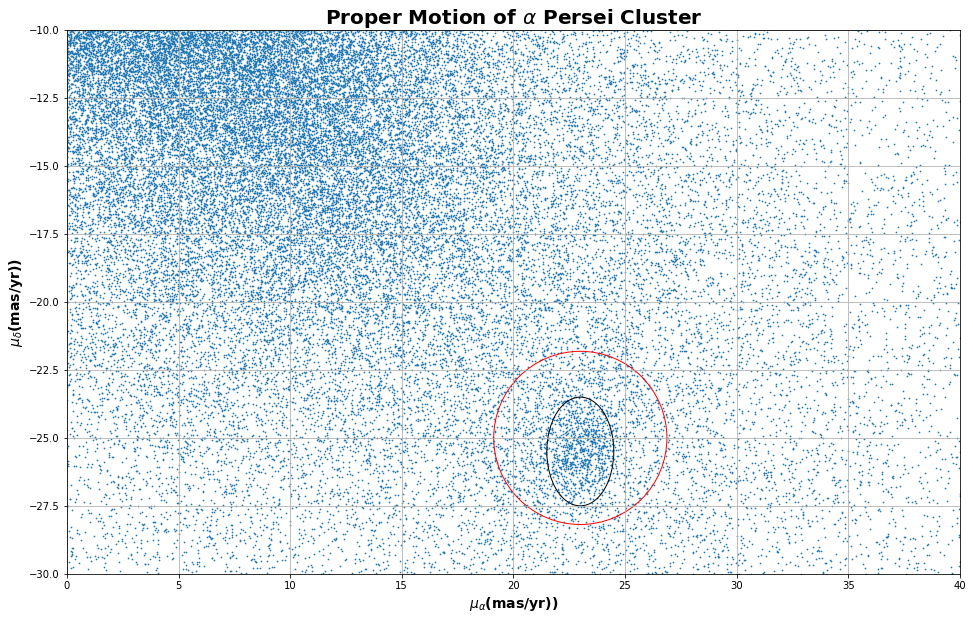

In [4]:
ax = plt.gca()
plt.scatter(data['pmra'],data['pmdec'], s=0.5)
plt.xlim(0, 40)
plt.ylim(-30, -10)
plt.scatter(23, -25, s=30000, facecolors='none', edgecolors='r')#circle of star cluster location
el = Ellipse((23, -25.5), 3, 4, angle=0, fill=None)
plt.title(r'Proper Motion of $\alpha$ Persei Cluster', fontsize=20)
plt.xlabel(r'$\mu_{\alpha}$(mas/yr))', fontsize=14)
plt.ylabel(r'$\mu_{\delta}$(mas/yr))', fontsize=14)
plt.grid()
ax.add_patch(el);

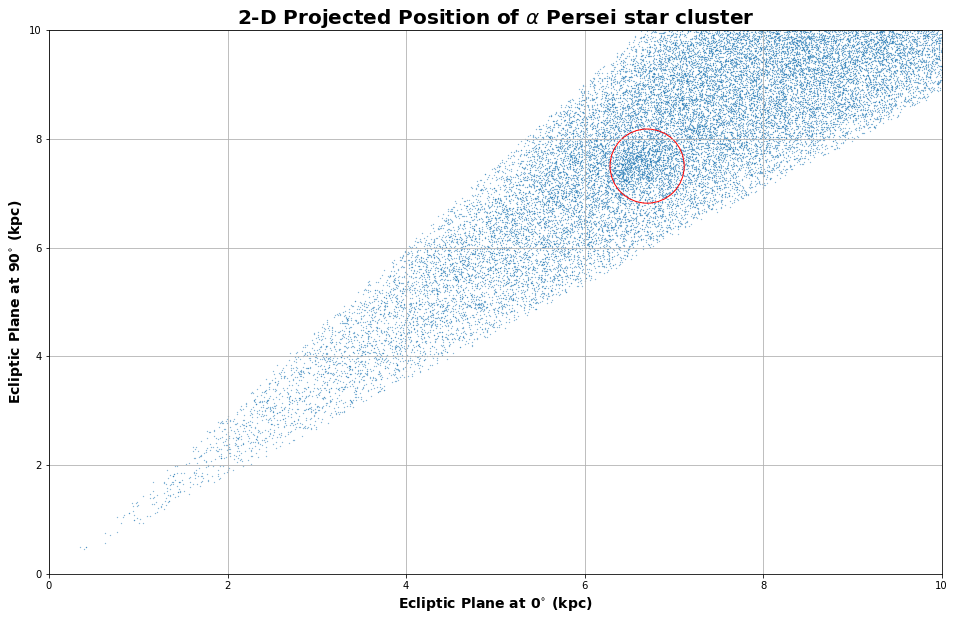

In [5]:
dist = 1/(data['parallax']*0.001) #distance (parsecs) = 1/parallax. 
#Since the initial parallax is in milli-arcsec, converted the data from 0.001 arcsec

rad = data['dec']*(2*np.pi/360) #numpy does trig functions in radians. Convert degrees by 2pi/360 degrees

xdeg = np.rad2deg(np.cos(rad)) #used rad2deg to have the radians back into degrees
ydeg = np.rad2deg(np.sin(rad))

x1 = dist*(xdeg) #using trigonometery we have x = distance*cos(distance)
y1 = dist*(ydeg) #y = distance*sin(distance)


plt.scatter(x1/1000, y1/1000, s = 0.05) #since the parsecs are large I reduce down to kiloparsecs
plt.title(r'2-D Projected Position of $\alpha$ Persei star cluster', fontsize=20)
plt.scatter(6.7, 7.5, s=5500, facecolors='none', edgecolors='r') #circle for possible location of star cluster
plt.ylabel(r'Ecliptic Plane at 90$^{\circ}$ (kpc)', fontsize=14)
plt.xlabel(r'Ecliptic Plane at 0$^{\circ}$ (kpc)', fontsize=14)
plt.xlim(0,10.000)
plt.ylim(0,10.000)
plt.grid();

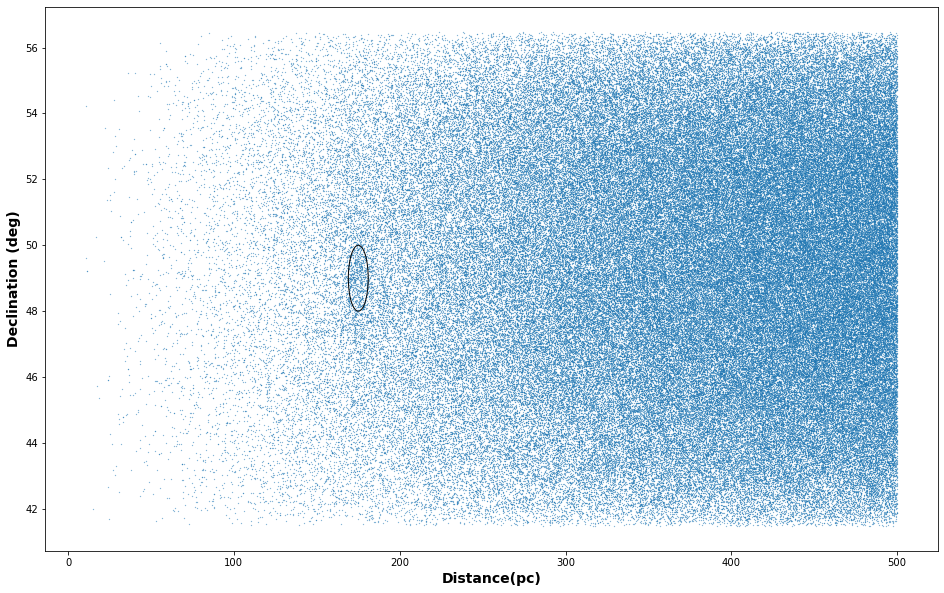

In [12]:
ax = plt.gca()
plt.scatter(dist, data['dec'], s = 0.05)
el = Ellipse((175, 49), 12, 2, angle=0, fill=None)
ax.add_patch(el)
plt.xlabel(r'Distance(pc)', fontsize=14)
plt.ylabel(r'Declination (deg)', fontsize=14);

In [7]:
#testing ellipse truth array
h = 175 #x-coordinate
k = 49 #y-coordinate

s = len(data['dec']) #gives overall size of the array
plecandx = [] 
plecandy = []
for (x,y) in zip(dist,data['dec']):
    distx = (x - h)/6 
    disty = (y - k)/1
    distance = np.sqrt(distx**2 + disty**2)
    if distance < 1:
        plecandx.append(x)
        plecandy.append(y)

In [8]:
len(data['dec'])

234471

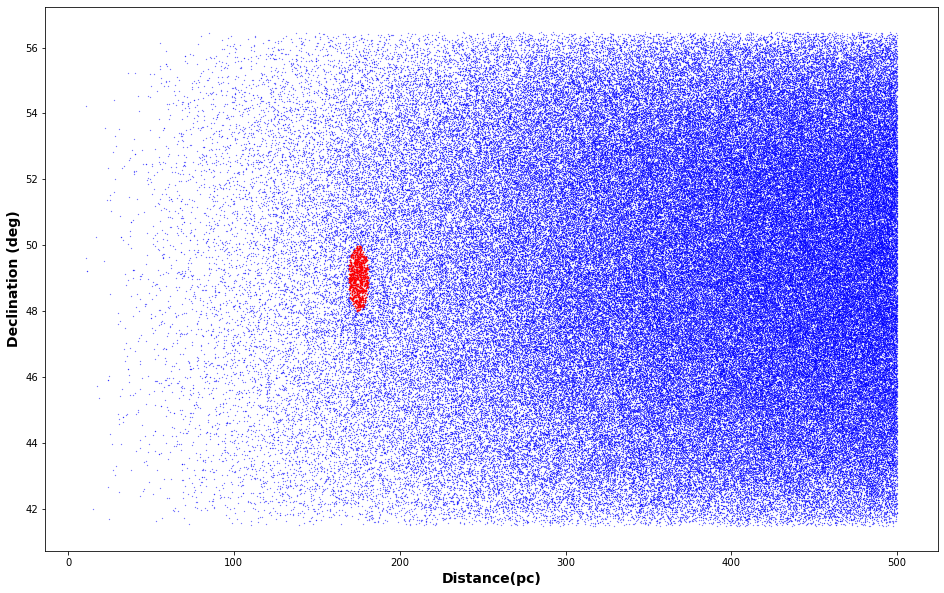

In [13]:
plt.scatter(dist, data['dec'], c='blue', s = 0.05)
plt.scatter(plecandx, plecandy, c='red', s=0.5)
plt.xlabel(r'Distance(pc)', fontsize=14)
plt.ylabel(r'Declination (deg)', fontsize=14);

In [10]:
#Truth array ellipse for proper motion
x = 23 #x-coordinate
y = -25.5 #y-coordinate
a=3 #x-radius
b=4 #y-radius
conpm = (data['pmra']-x)**2/a**2 + (data['pmdec']-y)**2/b**2 < 1

#truth array ellipse for distance and declination 
h = 175
k = 49
c=6 
d=1
condist = (1/(data['parallax']/1000)-h)**2/c**2 + (data['dec']-k)**2/d**2 < 1

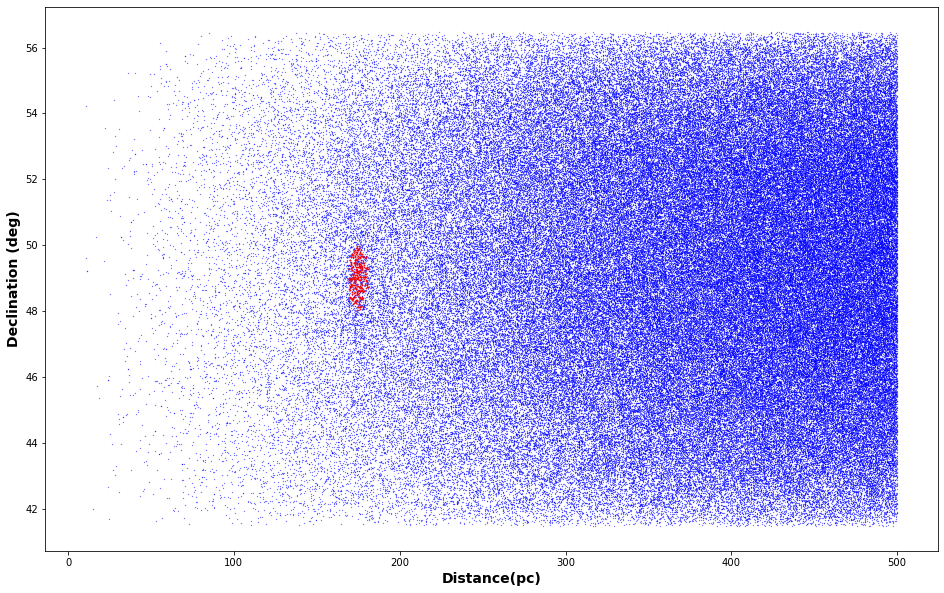

In [14]:
plt.scatter(dist, data['dec'], c='blue', s = 0.05)
plt.scatter(dist[conpm & condist], data['dec'][conpm & condist], c='red', s=0.5)
plt.xlabel(r'Distance(pc)', fontsize=14)
plt.ylabel(r'Declination (deg)', fontsize=14);

In [15]:
#for absolute magnitude
dist = 1/(data['parallax'][conpm & condist]*0.001) #units in parsec
#extinction AG = 0.272
M = data['phot_g_mean_mag'][conpm & condist] - 5*(np.log10(dist)-1) - 0.272

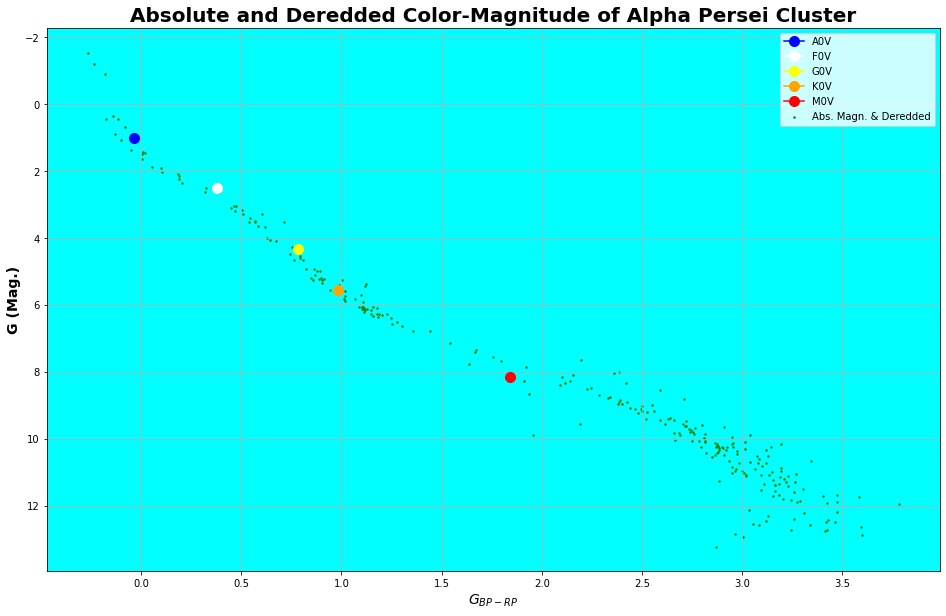

In [16]:
fig, ax = plt.subplots()
# reddening E(GBP − GRP ) = 0.151
ax.scatter(data['bp_rp'][conpm & condist] - 0.151,M, s=2, c='green', label='Abs. Magn. & Deredded')
ax.plot(-0.037,1.00, marker='.', ms=20, color='blue', label='A0V')
ax.plot(0.377, 2.51, marker='.', ms=20, color='white', label='F0V')
ax.plot(0.784, 4.325, marker='.', ms=20, color='yellow', label='G0V')
ax.plot(0.983, 5.55, marker='.', ms=20, color='orange', label='K0V')
ax.plot(1.84, 8.16, marker='.', ms=20, color='red', label='M0V')
ax.set_title('Absolute and Deredded Color-Magnitude of Alpha Persei Cluster', fontsize=20)
ax.set_ylabel('G (Mag.)', fontsize=14) #Convert this to absolute
fig.gca().invert_yaxis()
ax.set_xlabel('$G_{BP-RP}$', fontsize=14)
ax.set_facecolor("cyan")
ax.legend()
ax.grid();

#my final graph is absolute magnitude vs deredded 

a) Find and cite a reliable reference for the cluster iron abundance [Fe/H].

Boesgaard, A.M. et al (1988)
The mean [Fe/H] for the Pleiades is 0.00±0.05 and for α Per is +0.01±0.07. 
https://ui.adsabs.harvard.edu/abs/1988ApJ...327..389B/abstract

from Balachandran et al. 2011, average mean Fe abundance **[Fe/H] = −0.10**

Mon. Not. R. Astron. Soc. 410, 2526–2539 (2011) 
https://ui.adsabs.harvard.edu/abs/2011MNRAS.410.2526B/abstract

b) Plot MIST and PARSEC (http://stev.oapd.inaf.it/cgi-bin/cmd) isochrones for the appropriate age and chemical composition on the dereddened color-absolute magnitude diagram [(GBP − GRP )0 vs. MG] for cluster members. Comment on differences between the two isochrones.

- in log form, the time of the cluster is given in $\log_{10}(50 x 10^{6})$

In [25]:
#MIST isochrone data
isocmd = read_mist_models.ISOCMD('data/MIST_iso_624b5b6e39ab5.iso.cmd')
print('version: ', isocmd.version)
print('photometric system: ', isocmd.photo_sys)
print('abundances: ', isocmd.abun)
print('rotation: ', isocmd.rot)
print('ages: ', [round(x,2) for x in isocmd.ages])
print('number of ages: ', isocmd.num_ages)
print('available columns: ', isocmd.hdr_list)
print('Av extinction: ', isocmd.Av_extinction)

Reading in: data/MIST_iso_624b5b6e39ab5.iso.cmd
version:  {'MIST': '1.2', 'MESA': '7503'}
photometric system:  UBV(RI)c, 2MASS, Kepler, Hipparcos, Gaia (Vega)
abundances:  {'Yinit': 0.2661, 'Zinit': 0.0113902, '[Fe/H]': -0.1, '[a/Fe]': 0.0}
rotation:  0.0
ages:  [7.7]
number of ages:  1
available columns:  ['EEP', 'log10_isochrone_age_yr', 'initial_mass', 'star_mass', 'log_Teff', 'log_g', 'log_L', '[Fe/H]_init', '[Fe/H]', 'Bessell_U', 'Bessell_B', 'Bessell_V', 'Bessell_R', 'Bessell_I', '2MASS_J', '2MASS_H', '2MASS_Ks', 'Kepler_Kp', 'Kepler_D51', 'Hipparcos_Hp', 'Tycho_B', 'Tycho_V', 'Gaia_G_DR2Rev', 'Gaia_BP_DR2Rev', 'Gaia_RP_DR2Rev', 'Gaia_G_MAW', 'Gaia_BP_MAWb', 'Gaia_BP_MAWf', 'Gaia_RP_MAW', 'TESS', 'Gaia_G_EDR3', 'Gaia_BP_EDR3', 'Gaia_RP_EDR3', 'phase']
Av extinction:  0.0


My PARSEC data: http://stev.oapd.inaf.it/tmp/output37535776690.dat

In [28]:
for line in open('data/PARSEC.txt'):
  if line.startswith('#'):
    continue

In [30]:
data = np.genfromtxt('data/PARSEC.txt', names=True, delimiter=',') 
data

ValueError: could not convert string to float: b'0.018261 0.10000 7.70000 0.0900000036 1.0816895962    0.090 -2.555  3.3945  4.477    0  0.000  0.545     0.00     0.00     0.00     0.00     0.00 -1 -6.83e-16      0.00 7.005e-01 2.812e-01 3.294e-03 8.888e-04 8.060e-03 -1.000 1.832e-02 11.156 13.220 15.906 15.932 11.751'

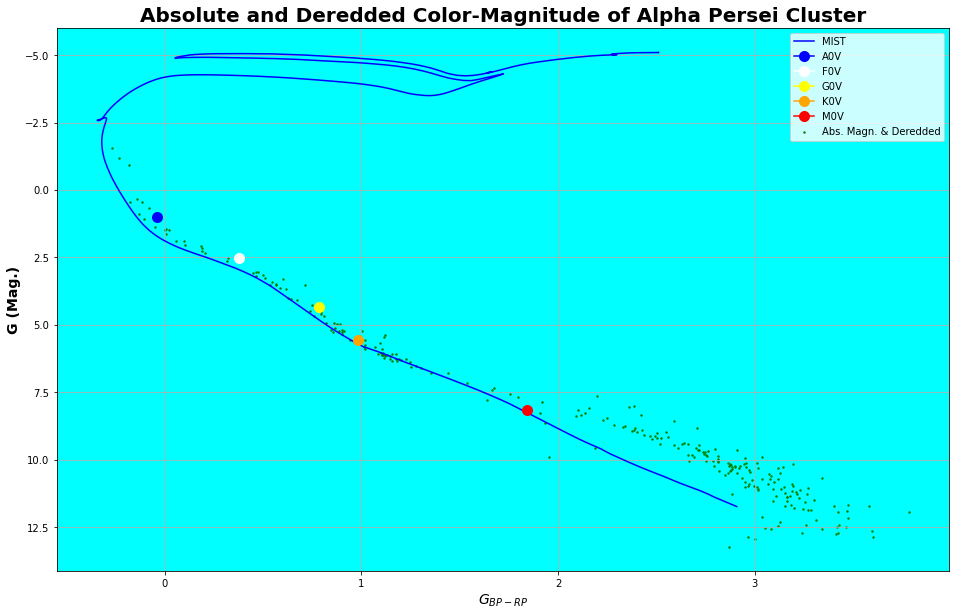

In [26]:
#MIST
age_ind = isocmd.age_index(7.7) #returns the index for the desired age
G = isocmd.isocmds[age_ind]['Gaia_G_MAW']
BP = isocmd.isocmds[age_ind]['Gaia_BP_MAWf']
RP = isocmd.isocmds[age_ind]['Gaia_RP_MAW'] 

fig, ax = plt.subplots()
# reddening E(GBP − GRP ) = 0.151
ax.scatter(data['bp_rp'][conpm & condist] - 0.151,M, s=2, c='green', label='Abs. Magn. & Deredded')
ax.plot((BP-RP), G, color='blue', label='MIST')
ax.plot(-0.037,1.00, marker='.', ms=20, color='blue', label='A0V')
ax.plot(0.377, 2.51, marker='.', ms=20, color='white', label='F0V')
ax.plot(0.784, 4.325, marker='.', ms=20, color='yellow', label='G0V')
ax.plot(0.983, 5.55, marker='.', ms=20, color='orange', label='K0V')
ax.plot(1.84, 8.16, marker='.', ms=20, color='red', label='M0V')
ax.set_title('Absolute and Deredded Color-Magnitude of Alpha Persei Cluster', fontsize=20)
ax.set_ylabel('G (Mag.)', fontsize=14) #Convert this to absolute
fig.gca().invert_yaxis()
ax.set_xlabel('$G_{BP-RP}$', fontsize=14)
ax.set_facecolor("cyan")
ax.legend()
ax.grid();

Based on the MIST Isochrone being 50 Myr, it would appear to match up with dereddened color-absolute magnitude diagram that reveals the state of the stars of the cluster. Most of the stars based on the Mamajek spectral type table seem to occur in the main-sequence range along the isochrone. There a group of stars that fall of the end of the isochrone. This could suggest that either they are young stars in pre-main sequence stage or more likely since they are low in magnitude they could be background stars outside of the cluster. The highest stars in magnitude appear to be A and possibly B type stars.

4. TWO-PERSON COLLABORATION PROBLEM. Stellar PopulationContributions. 
a) Download MIST isochrones for solar metallicity at ages of $10^{8}, 10^{9},$ and $10^{10}$ years. Plot an HR Diagram with all three isochrones, with color-coding for main sequence (MS), subgiant branch (SGB) plus red giant branch (RGB), core He burning(coreHe), and asymptotic giant branch (AGB) parts.
b) Assuming a Salpeter IMF for the numbers of stars, determine the fraction of the total luminosity generated by each of evolutionary stages given in part a). Tabulate your results for each of the ages, and graph these contributions versus log age.

http://waps.cfa.harvard.edu/MIST/read_mist_models_demo.html

In [2]:
iso = read_mist_models.ISO('data/MIST_iso_624775b4c23c9.iso')

Reading in: data/MIST_iso_624775b4c23c9.iso


In [3]:
print('version: ', iso.version)
print('abundances: ', iso.abun)
print('rotation: ', iso.rot)
print('ages: ', [round(x,2) for x in iso.ages])
print('number of ages: ', iso.num_ages)
print('available columns: ', iso.hdr_list)

version:  {'MIST': '1.2', 'MESA': '7503'}
abundances:  {'Yinit': 0.2703, 'Zinit': 0.0142, '[Fe/H]': 0.0, '[a/Fe]': 0.0}
rotation:  0.0
ages:  [8.0, 9.0, 10.0]
number of ages:  3
available columns:  ['EEP', 'log10_isochrone_age_yr', 'initial_mass', 'star_mass', 'star_mdot', 'he_core_mass', 'c_core_mass', 'log_L', 'log_LH', 'log_LHe', 'log_Teff', 'log_R', 'log_g', 'surface_h1', 'surface_he3', 'surface_he4', 'surface_c12', 'surface_o16', 'log_center_T', 'log_center_Rho', 'center_gamma', 'center_h1', 'center_he4', 'center_c12', 'phase']


Text(0, 0.5, 'log(L)')

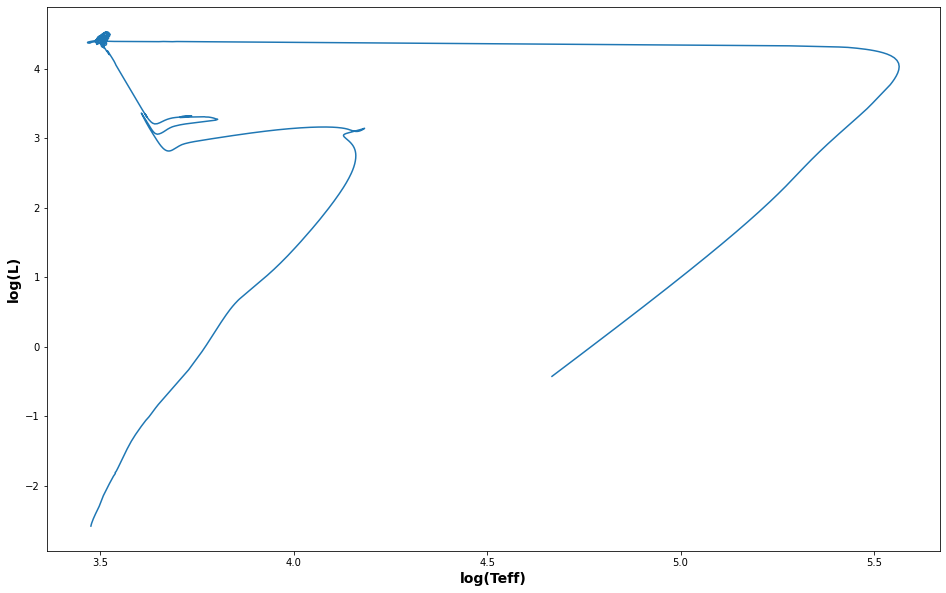

In [4]:
age_ind = iso.age_index(8.0) #returns the index for the desired age
logTeff = iso.isos[age_ind]['log_Teff']
logL = iso.isos[age_ind]['log_L']
plt.plot(logTeff, logL) 
plt.xlabel('log(Teff)')
plt.ylabel('log(L)')
#plt.axis([8.0, 9.0, 10.0])

Text(0, 0.5, 'log(L)')

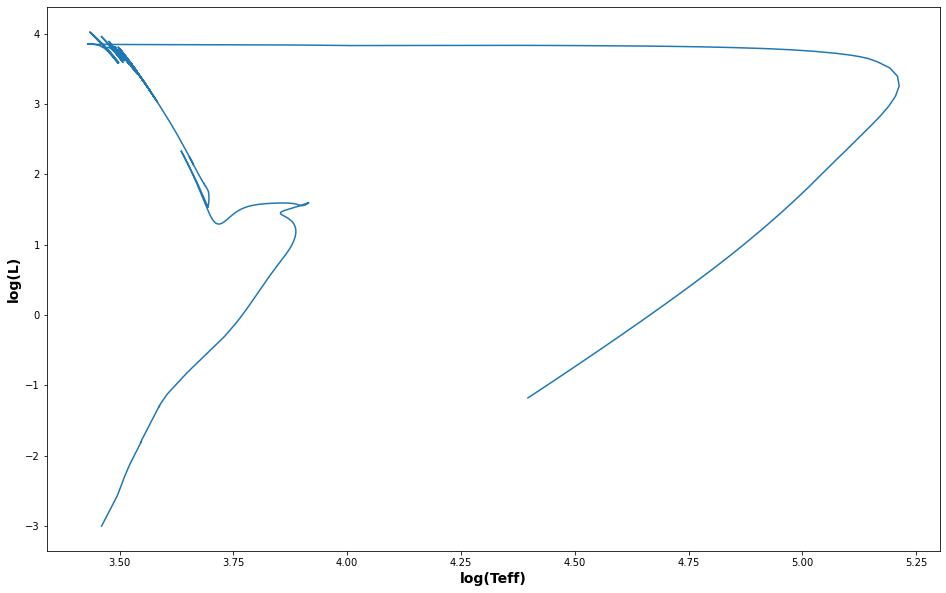

In [5]:
age_ind = iso.age_index(9.0) #returns the index for the desired age
logTeff = iso.isos[age_ind]['log_Teff']
logL = iso.isos[age_ind]['log_L']
plt.plot(logTeff, logL) 
plt.xlabel('log(Teff)')
plt.ylabel('log(L)')
#plt.axis([8.0, 9.0, 10.0])

Text(0, 0.5, 'log(L)')

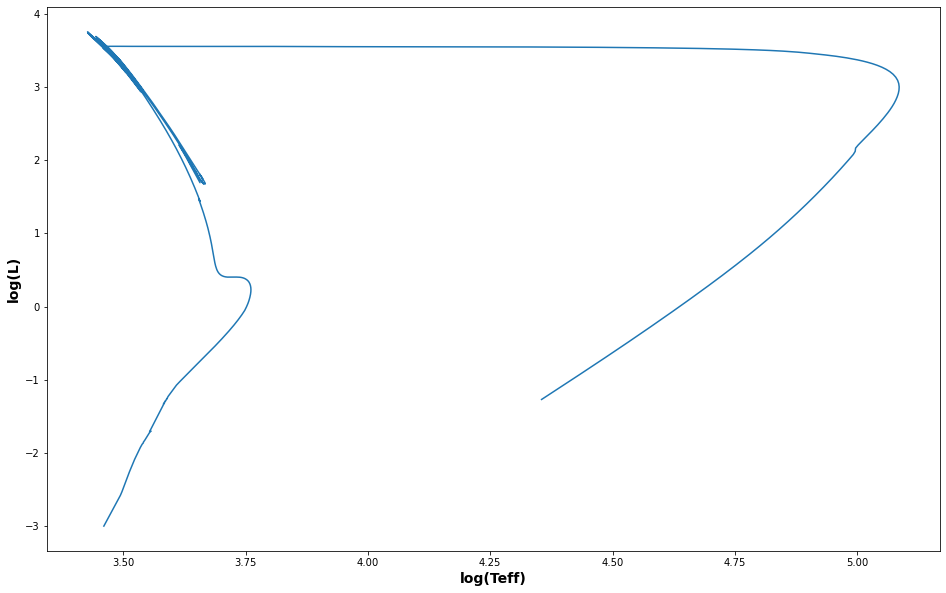

In [6]:
age_ind = iso.age_index(10.0) #returns the index for the desired age
logTeff = iso.isos[age_ind]['log_Teff']
logL = iso.isos[age_ind]['log_L']
plt.plot(logTeff, logL) 
plt.xlabel('log(Teff)')
plt.ylabel('log(L)')

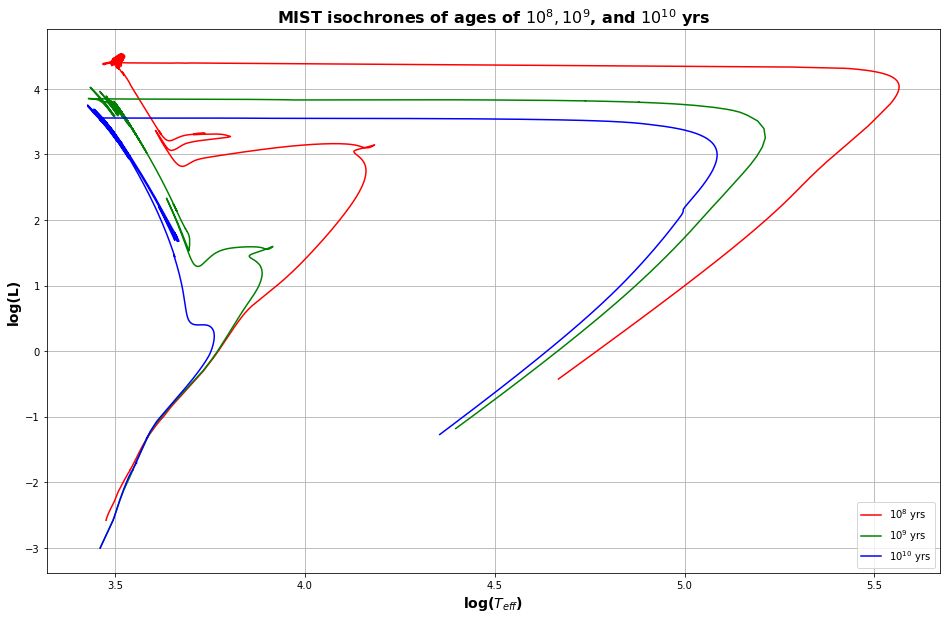

In [10]:
#for ages of 10^8 yr
age_ind = iso.age_index(8.0) #returns the index for the desired age
logTeff = iso.isos[age_ind]['log_Teff']
logL = iso.isos[age_ind]['log_L']
#for ages of 10^9 yr
age_ind1 = iso.age_index(9.0) #returns the index for the desired age
logTeff1 = iso.isos[age_ind1]['log_Teff']
logL1 = iso.isos[age_ind1]['log_L']
#for ages of 10^10 yr
age_ind2 = iso.age_index(10.0) #returns the index for the desired age
logTeff2 = iso.isos[age_ind2]['log_Teff']
logL2 = iso.isos[age_ind2]['log_L']

plt.plot(logTeff, logL, c='r', label=r'$10^{8}$ yrs')
plt.plot(logTeff1, logL1, c='g', label=r'$10^{9}$ yrs')
plt.plot(logTeff2, logL2, c='b', label=r'$10^{10}$ yrs')
plt.title('MIST isochrones of ages of $10^{8}, 10^{9}$, and $10^{10}$ yrs')
plt.xlabel(r'log($T_{eff}$)')
plt.ylabel('log(L)')
plt.legend()
plt.grid();

In [11]:
phase = iso.isos[age_ind]['phase']
phase

array([-1., -1., -1., ...,  6.,  6.,  6.])

In [25]:

iso1 = iso.isos[age_ind]
iso1.plot_HR_ISO(logTeff, logL, color='Black', phases=[0, 6], phasecolor=['Red', 'Blue'])

AttributeError: 'numpy.ndarray' object has no attribute 'plot_HR_ISO'

Text(0, 0.5, 'log(L)')

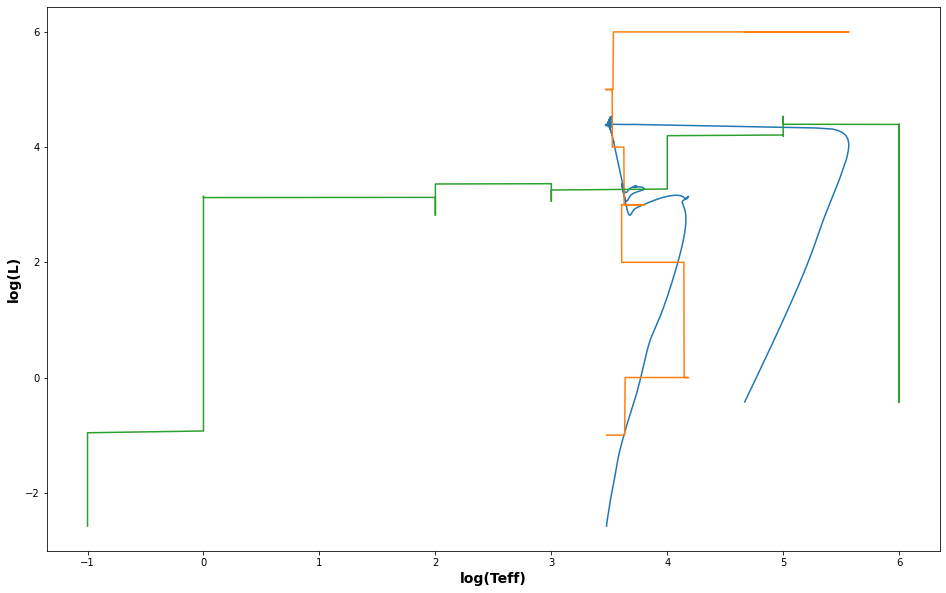

In [17]:
age_ind = iso.age_index(8.0) #returns the index for the desired age
logTeff = iso.isos[age_ind]['log_Teff']
logL = iso.isos[age_ind]['log_L']
phase = iso.isos[age_ind]['phase']
plt.plot(logTeff, logL) 
plt.plot(logTeff, phase)
plt.plot(phase, logL)
plt.xlabel('log(Teff)')
plt.ylabel('log(L)')
#plt.axis([8.0, 9.0, 10.0])

In [15]:
eep = read_mist_models.EEP('data/0008590M.track.eep')

Reading in: data/0008590M.track.eep


C:\Users\jjuni\OneDrive\Documents\SDSU\Spring2022\Astr630\HW\coding\read_mist_models.py:287: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


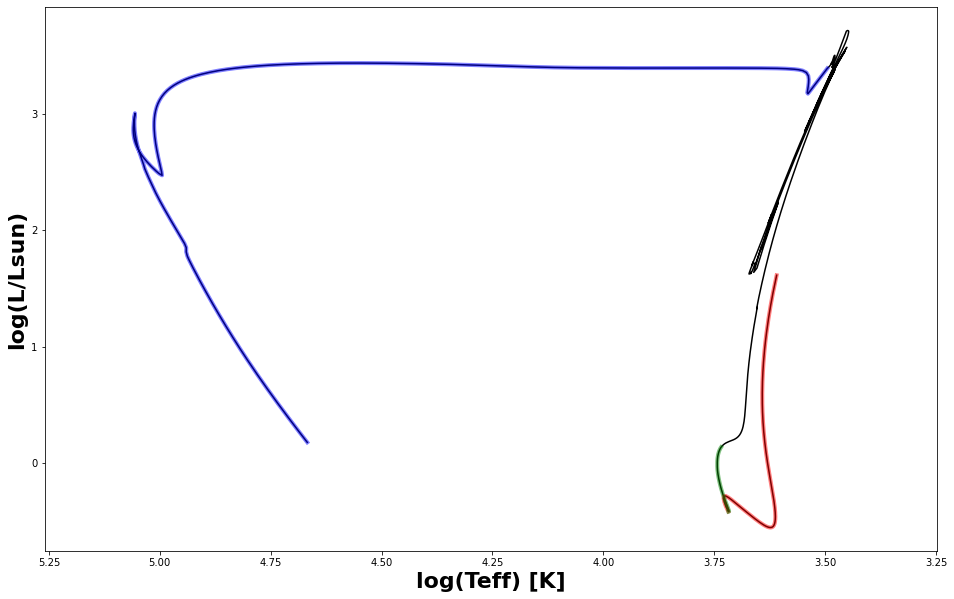

In [16]:
eep.plot_HR(color='Black', phases=[-1, 0, 6], phasecolor=['Red', 'Green', 'Blue'], label='Track')

In [2]:

iso = read_mist_models_Copy1.ISO('data/MIST_iso_624a684caa1cb.iso')

Reading in: data/MIST_iso_624a684caa1cb.iso


In [3]:
print('version: ', iso.version)
print('abundances: ', iso.abun)
print('rotation: ', iso.rot)
print('ages: ', [round(x,2) for x in iso.ages])
print('number of ages: ', iso.num_ages)
print('available columns: ', iso.hdr_list)

version:  {'MIST': '1.2', 'MESA': '7503'}
abundances:  {'Yinit': 0.2703, 'Zinit': 0.0142, '[Fe/H]': 0.0, '[a/Fe]': 0.0}
rotation:  0.0
ages:  [8.0]
number of ages:  1
available columns:  ['EEP', 'log10_isochrone_age_yr', 'initial_mass', 'star_mass', 'star_mdot', 'he_core_mass', 'c_core_mass', 'log_L', 'log_LH', 'log_LHe', 'log_Teff', 'log_R', 'log_g', 'surface_h1', 'surface_he3', 'surface_he4', 'surface_c12', 'surface_o16', 'log_center_T', 'log_center_Rho', 'center_gamma', 'center_h1', 'center_he4', 'center_c12', 'phase']


In [4]:
iso.plot_HR_ISO(color='Black', phases=[-1, 0, 6], phasecolor=['Red', 'Green', 'Blue'], label='Track')

TypeError: list indices must be integers or slices, not str

In [18]:
x = 2.35
a = 3.5
M_max = 150 
M_min = 0.08

b = (1-x)/(2-x)
c = ((M_max)**(2-x)) - ((M_min)**(2-x))
d = ((M_max)**(1-x)) - ((M_min)**(1-x))

y = b*(c/d)
y

0.2865122088106972

In [19]:
i = (1-x)/(a-x+1)
j = ((M_max)**(a-x+1)) - ((M_min)**(a-x+1))
k = ((M_max)**(1-x)) - ((M_min)**(1-x))

w = i*(j/k)
w

990.1010589066012

In [20]:
m = (1-x)/(a-x)
n = ((M_max)**(a-x)) - ((M_min)**(a-x))
o = ((M_max)**(1-x)) - ((M_min)**(1-x))

v = m*(n/o)
v

12.338266052282316

In [22]:
M_maxBH = 150 
M_minBH = 25

r = (1-x)/(2-x)
s = ((M_maxBH)**(2-x)) - ((M_minBH)**(2-x))
t = ((M_maxBH)**(1-x)) - ((M_minBH)**(1-x))

z = r*(s/t)
z

49.31310333765141